In [33]:
# import packages
import numpy as np
import pylab as py
import pdb
import matplotlib.pyplot as plt
import math

# import spisea packages
from spisea import synthetic, evolution, atmospheres, reddening, ifmr
from spisea.imf import imf, multiplicity

# import nbody6tools reader to read data
from nbody6tools import Reader

# import nbody62spisea to retrieve star ages
from nbody62spisea import converter

## Set up parameters, create isochrone grid

In [34]:
# define isochrone parameters
AKs = 0
dist = 410
evo_model = evolution.MISTv1()
atm_func = atmospheres.get_merged_atmosphere
red_law = reddening.RedLawHosek18b()
filt_list = ['jwst,F115W', 'jwst,F182M']
filters = ['m_jwst_F115W', 'm_jwst_F182M']
iso_dir = 'isochrones/'
metallicity = 0

In [35]:
# read nbody data
path_to_data = '../../../../../../storage/jfarias/Data/Orion/massive_clusters/M3000new/sigma1p0/fiducial/sfe_ff100/01/'
snapshot = Reader.read_snapshot(path_to_data, time = 10)

# convert snapshot values from nbody units to astrophysical, extract masses
snapshot.to_physical()

# read ages for simulated stars
cluster_table = converter.to_spicea_table(snapshot)

print(cluster_table)

        mass        isMultiple        compMass            systemMass             e                log_a              age        
------------------- ---------- --------------------- ------------------- ------------------ ----------------- ------------------
0.30878218400323887        0.0                    [] 0.30878218400323887                nan               nan  9.994262305564765
0.20521057686429406        0.0                    [] 0.20521057686429406                nan               nan  9.994262305564765
 0.5096667247284553        0.0                    []  0.5096667247284553                nan               nan 10.011217732083537
 0.9569014960976189        0.0                    []  0.9569014960976189                nan               nan 10.003485393592152
                ...        ...                   ...                 ...                ...               ...                ...
 0.8507840072707461        1.0  [0.5046221281193293]  1.3554061353900755 0.7210195108733646 2.886

In [36]:
masses = cluster_table['mass']
level_ages = cluster_table['age']

for i in range(len(level_ages)):
    level_ages[i] = level_ages[i] * 1e6

# convert log ages from log(Myr) to log(yr)
log_ages = np.log10(level_ages)

# print(log_ages)
print("Min log age = " + str(min(log_ages)))
print("Max log age = " + str(max(log_ages)))

# print(level_ages)
print("Min level age = " + str(min(level_ages)))
print("Max level age = " + str(max(level_ages)))

Min log age = 6.999281037520533
Max log age = 7.0008264045271105
Min level age = 9983458.972507566
Max level age = 10019046.783447266


In [37]:
# find index of first binary, create array of companion masses
first_binary = 0
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        first_binary = i
        break
print(first_binary)

compMasses = []
for i in range(len(cluster_table)):
    if cluster_table['isMultiple'][i] == 1.0:
        compMasses.append(cluster_table['compMass'][i][0])
print(compMasses)

1758
[0.08322867394489827, 0.17430595835645815, 0.17453191574838653, 1.3123554119438334, 0.1331536008244365, 0.24788939814331098, 0.1584608434543561, 0.014334999777545343, 0.08134655226192634, 0.15446703011578758, 0.013098692699319294, 0.10708825758253775, 0.010009818436913613, 0.12147412966810443, 0.04178047457179154, 0.01790593342017426, 0.20180014615315064, 0.07780292519501959, 0.010047947509327238, 0.057953857299831824, 0.08196362978879446, 0.02916076794864267, 0.09648295655435167, 0.2631523498563259, 0.23656144738197327, 0.3184168338775635, 0.08478460424846954, 0.08376163279457305, 0.20336992940443183, 0.2655369844477134, 0.01806364130249243, 0.15262614360673818, 0.01922854127274504, 0.015777133052208906, 0.21108175814151764, 0.40972047922696153, 0.013599112838659116, 0.058366613351504705, 0.5190109014511108, 0.07545112235154701, 0.11809970434958626, 0.03695772840653769, 0.01990871769235844, 0.0870746523141861, 0.013525586232529701, 0.05030771137443556, 0.01670930073155574, 0.0713

0.7159035387401531
0.9241486438819625
0.586889853101509
0.9379270624108862
0.7597289791777503
0.5967709884777179
0.5053373588542781
0.956175605792062
0.4796406773477339
0.8372427584401417
0.91079454418979
0.8400934400894203
0.5478084381764158
0.3289628771862333
0.7285378626587217
0.6186793570964132
0.28274767786066135
0.9723997344223383
0.5897861056152568
0.9995110707933847
0.3231307655812681
0.49963200362496357
0.6999843628514995
0.5788665957006197
0.5558497454285006
0.7333249448851804
0.670347757372215
0.5936921244578632
0.29434731605254727
0.4725700823132372
0.454950178920088
0.5309677829029682
0.2867599232192515
0.8206600885957936
0.6300203530259526
0.4236817621257895
0.5357897751305761
0.49682271332953576
0.6440029909052518
0.8932853624285307
0.721855793061436
0.7258547862075255
0.985318812749798
0.533424918238352
0.1692080082617071
0.4472179614809532
0.18935660000603224
0.792809074677912
0.7965521610814356
0.6636120754118693
0.6571298791573809
0.8209614850787322
0.454956977422549

(array([  7.,  15.,  80., 129., 196., 188., 168., 163., 175., 139.,   3.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 20 artists>)

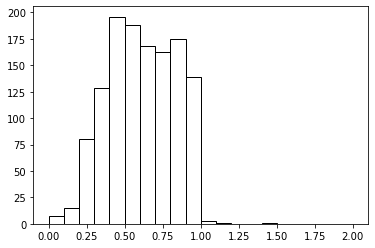

In [38]:
ratios = []
for i in range(len(compMasses)):
    ratios.append(compMasses[i] / masses[i + first_binary])
    print(ratios[i])

py.hist(ratios, bins=20, range=[0, 2], fill=False)

In [39]:
start = (min(level_ages) // 0.5e6) * 0.5e6
end = (max(level_ages) // 0.5e6) * 0.5e6 + 2 * 0.5e6
increment = 0.5e6  # 500,000

# Create age arrays
level_age_arr = np.arange(start, end, increment)
log_age_arr = np.log10(level_age_arr)

print(log_age_arr)
print(level_age_arr)

[6.97772361 7.         7.0211893 ]
[ 9500000. 10000000. 10500000.]


In [40]:
# create isochrone grid - if this is the first time, then this is going to take an hour lmfao
instances = np.empty(len(log_age_arr), dtype=object)

for i in range(len(log_age_arr)):
    my_iso = synthetic.IsochronePhot(log_age_arr[i], AKs, dist, metallicity=metallicity,
                            evo_model=evo_model, atm_func=atm_func,
                            red_law=red_law, filters=filt_list,
                                iso_dir=iso_dir)
    instances[i] = my_iso
        
print("isochrone generation done")

isochrone generation done


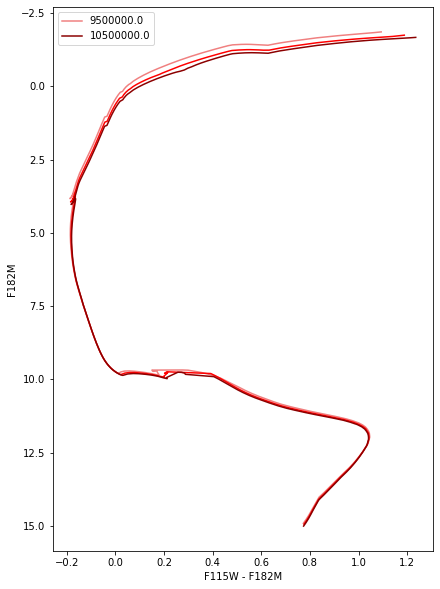

In [41]:
# identify array indeces, create array for labels and colors
idx_arr = range(0, len(log_age_arr))
if len(idx_arr) > 3:
    idx_arr = idx_arr[::2]

# Plot CMD
fig, axes = py.subplots(figsize=(15, 10))
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

In [42]:
import sys
sys.path.append('/scratch/wyz5rge/synthetic-hr/12-18')
import interpolatorExp as interpolator

level_ages_myr = level_ages / 1e6
# print(level_ages_myr)

# create array of stars
stars = np.empty(len(cluster_table), dtype=object)

# perform interpolation for each star
for i in range(len(stars)):
    # print(str(i) + " " + str(level_ages_myr[i]) + " " + str(masses[i]))
    stars[i] = interpolator.interpolate(level_ages_myr[i], masses[i], instances, log_age_arr, filters)
    
# convert luminosity values to solar luminosities
watts_to_lsun = 1.0 / (3.846e26) # conversion factor for watts to Lsun

for i in range(len(stars)):
    if stars[i] is None:
        continue
    stars[i][0] = stars[i][0] * watts_to_lsun
    
for i in range(len(stars)):
    print(stars[i])


Desired mass 0.08473872306617228 is outside the range of the isochrone.
Desired mass 0.08473872306617228 is outside the range of the isochrone.
Desired mass 0.041298986653869434 is outside the range of the isochrone.
Desired mass 0.041298986653869434 is outside the range of the isochrone.
Desired mass 0.039756425478307614 is outside the range of the isochrone.
Desired mass 0.039756425478307614 is outside the range of the isochrone.
Desired mass 0.019286720399209596 is outside the range of the isochrone.
Desired mass 0.019286720399209596 is outside the range of the isochrone.
Desired mass 0.04910238395476356 is outside the range of the isochrone.
Desired mass 0.04910238395476356 is outside the range of the isochrone.
Desired mass 0.027667711145519504 is outside the range of the isochrone.
Desired mass 0.027667711145519504 is outside the range of the isochrone.
Desired mass 0.059044784989548224 is outside the range of the isochrone.
Desired mass 0.059044784989548224 is outside the range 

Desired mass 0.01318728016099462 is outside the range of the isochrone.
Desired mass 0.02445174939930439 is outside the range of the isochrone.
Desired mass 0.02445174939930439 is outside the range of the isochrone.
Desired mass 0.08227600937996145 is outside the range of the isochrone.
Desired mass 0.08227600937996145 is outside the range of the isochrone.
Desired mass 0.018708340298365544 is outside the range of the isochrone.
Desired mass 0.018708340298365544 is outside the range of the isochrone.
Desired mass 0.05097134307507954 is outside the range of the isochrone.
Desired mass 0.05097134307507954 is outside the range of the isochrone.
Desired mass 0.04711078949340418 is outside the range of the isochrone.
Desired mass 0.04711078949340418 is outside the range of the isochrone.
Desired mass 0.033428369732912196 is outside the range of the isochrone.
Desired mass 0.033428369732912196 is outside the range of the isochrone.
Desired mass 0.026073669899769513 is outside the range of th

Desired mass 0.06551650009215594 is outside the range of the isochrone.
Desired mass 0.06551650009215594 is outside the range of the isochrone.
Desired mass 0.02148674327707196 is outside the range of the isochrone.
Desired mass 0.02148674327707196 is outside the range of the isochrone.
Desired mass 0.014946186618465791 is outside the range of the isochrone.
Desired mass 0.014946186618465791 is outside the range of the isochrone.
Desired mass 0.10408990973663375 is outside the range of the isochrone.
Desired mass 0.015328571886568948 is outside the range of the isochrone.
Desired mass 0.015328571886568948 is outside the range of the isochrone.
Desired mass 0.054604204095971796 is outside the range of the isochrone.
Desired mass 0.054604204095971796 is outside the range of the isochrone.
Desired mass 0.05272236249644224 is outside the range of the isochrone.
Desired mass 0.05272236249644224 is outside the range of the isochrone.
Desired mass 0.02242943095113024 is outside the range of t

Desired mass 0.090874598049271 is outside the range of the isochrone.
Desired mass 0.090874598049271 is outside the range of the isochrone.
Desired mass 0.06154535098988091 is outside the range of the isochrone.
Desired mass 0.06154535098988091 is outside the range of the isochrone.
Desired mass 0.018004464725174894 is outside the range of the isochrone.
Desired mass 0.018004464725174894 is outside the range of the isochrone.
Desired mass 0.01409854489876249 is outside the range of the isochrone.
Desired mass 0.01409854489876249 is outside the range of the isochrone.
Desired mass 0.06968962266037468 is outside the range of the isochrone.
Desired mass 0.06968962266037468 is outside the range of the isochrone.
Desired mass 0.02792936801960677 is outside the range of the isochrone.
Desired mass 0.02792936801960677 is outside the range of the isochrone.
Desired mass 0.08203835922523475 is outside the range of the isochrone.
Desired mass 0.08203835922523475 is outside the range of the isoch

Desired mass 0.07466732862381727 is outside the range of the isochrone.
Desired mass 0.07466732862381727 is outside the range of the isochrone.
Desired mass 0.04779493176562139 is outside the range of the isochrone.
Desired mass 0.04779493176562139 is outside the range of the isochrone.
Desired mass 0.01960039102649779 is outside the range of the isochrone.
Desired mass 0.01960039102649779 is outside the range of the isochrone.
Desired mass 0.0777578042046739 is outside the range of the isochrone.
Desired mass 0.0777578042046739 is outside the range of the isochrone.
Desired mass 0.08202241997406805 is outside the range of the isochrone.
Desired mass 0.08202241997406805 is outside the range of the isochrone.
Desired mass 0.09214411476238389 is outside the range of the isochrone.
Desired mass 0.09214411476238389 is outside the range of the isochrone.
Desired mass 0.0626781543209741 is outside the range of the isochrone.
Desired mass 0.0626781543209741 is outside the range of the isochro

Desired mass 0.06865315837884124 is outside the range of the isochrone.
Desired mass 0.06865315837884124 is outside the range of the isochrone.
Desired mass 0.09338660227389889 is outside the range of the isochrone.
Desired mass 0.09338660227389889 is outside the range of the isochrone.
Desired mass 0.08921630682887097 is outside the range of the isochrone.
Desired mass 0.08921630682887097 is outside the range of the isochrone.
Desired mass 0.04381459813122642 is outside the range of the isochrone.
Desired mass 0.04381459813122642 is outside the range of the isochrone.
Desired mass 0.016520828540944294 is outside the range of the isochrone.
Desired mass 0.016520828540944294 is outside the range of the isochrone.
Desired mass 0.05595611069034868 is outside the range of the isochrone.
Desired mass 0.05595611069034868 is outside the range of the isochrone.
Desired mass 0.059518400522686726 is outside the range of the isochrone.
Desired mass 0.059518400522686726 is outside the range of the

Desired mass 0.0668334267851224 is outside the range of the isochrone.
Desired mass 0.0668334267851224 is outside the range of the isochrone.
Desired mass 0.06765922765520134 is outside the range of the isochrone.
Desired mass 0.06765922765520134 is outside the range of the isochrone.
Desired mass 0.10354106590013619 is outside the range of the isochrone.
Desired mass 0.07465589224109598 is outside the range of the isochrone.
Desired mass 0.07465589224109598 is outside the range of the isochrone.
Desired mass 0.029888925078100235 is outside the range of the isochrone.
Desired mass 0.029888925078100235 is outside the range of the isochrone.
Desired mass 0.027755894485353313 is outside the range of the isochrone.
Desired mass 0.027755894485353313 is outside the range of the isochrone.
Desired mass 0.10290278347195363 is outside the range of the isochrone.
Desired mass 0.0699836745460819 is outside the range of the isochrone.
Desired mass 0.0699836745460819 is outside the range of the iso

Desired mass 0.09449037608824083 is outside the range of the isochrone.
Desired mass 0.09449037608824083 is outside the range of the isochrone.
Desired mass 0.029183704011439094 is outside the range of the isochrone.
Desired mass 0.029183704011439094 is outside the range of the isochrone.
Desired mass 0.07534830598035439 is outside the range of the isochrone.
Desired mass 0.07534830598035439 is outside the range of the isochrone.
Desired mass 0.06810193172824557 is outside the range of the isochrone.
Desired mass 0.06810193172824557 is outside the range of the isochrone.
Desired mass 0.10282783461498436 is outside the range of the isochrone.
Desired mass 0.08856900831499216 is outside the range of the isochrone.
Desired mass 0.08856900831499216 is outside the range of the isochrone.
Desired mass 0.06947077633098986 is outside the range of the isochrone.
Desired mass 0.06947077633098986 is outside the range of the isochrone.
Desired mass 0.05366990517606603 is outside the range of the i

Desired mass 0.045396510634608034 is outside the range of the isochrone.
Desired mass 0.045396510634608034 is outside the range of the isochrone.
Desired mass 0.041169002073143536 is outside the range of the isochrone.
Desired mass 0.041169002073143536 is outside the range of the isochrone.
Desired mass 0.049868701971893116 is outside the range of the isochrone.
Desired mass 0.049868701971893116 is outside the range of the isochrone.
Desired mass 0.05688053644467524 is outside the range of the isochrone.
Desired mass 0.05688053644467524 is outside the range of the isochrone.
Desired mass 0.055156165745548366 is outside the range of the isochrone.
Desired mass 0.055156165745548366 is outside the range of the isochrone.
Desired mass 0.028469507953622984 is outside the range of the isochrone.
Desired mass 0.028469507953622984 is outside the range of the isochrone.
Desired mass 0.020629370772654386 is outside the range of the isochrone.
Desired mass 0.020629370772654386 is outside the rang

Desired mass 0.09637201983045197 is outside the range of the isochrone.
Desired mass 0.09637201983045197 is outside the range of the isochrone.
Desired mass 0.022060386461626204 is outside the range of the isochrone.
Desired mass 0.022060386461626204 is outside the range of the isochrone.
Desired mass 0.011376608999915721 is outside the range of the isochrone.
Desired mass 0.011376608999915721 is outside the range of the isochrone.
Desired mass 0.06101928511541223 is outside the range of the isochrone.
Desired mass 0.06101928511541223 is outside the range of the isochrone.
Desired mass 0.08872684955530305 is outside the range of the isochrone.
Desired mass 0.08872684955530305 is outside the range of the isochrone.
Desired mass 0.018527342556314906 is outside the range of the isochrone.
Desired mass 0.018527342556314906 is outside the range of the isochrone.
Desired mass 0.02051696293475114 is outside the range of the isochrone.
Desired mass 0.02051696293475114 is outside the range of t

Desired mass 0.026534861087488308 is outside the range of the isochrone.
Desired mass 0.07247725916366483 is outside the range of the isochrone.
Desired mass 0.07247725916366483 is outside the range of the isochrone.
Desired mass 0.058124530602372104 is outside the range of the isochrone.
Desired mass 0.058124530602372104 is outside the range of the isochrone.
Desired mass 0.02173566239175939 is outside the range of the isochrone.
Desired mass 0.02173566239175939 is outside the range of the isochrone.
Desired mass 0.06435029579150824 is outside the range of the isochrone.
Desired mass 0.06435029579150824 is outside the range of the isochrone.
Desired mass 0.0669473510433459 is outside the range of the isochrone.
Desired mass 0.0669473510433459 is outside the range of the isochrone.
Desired mass 0.08180756655312667 is outside the range of the isochrone.
Desired mass 0.08180756655312667 is outside the range of the isochrone.
Desired mass 0.07948850662307415 is outside the range of the is

Desired mass 0.07177338672579871 is outside the range of the isochrone.
Desired mass 0.07177338672579871 is outside the range of the isochrone.
Desired mass 0.040611624512987526 is outside the range of the isochrone.
Desired mass 0.040611624512987526 is outside the range of the isochrone.
Desired mass 0.08083605489515955 is outside the range of the isochrone.
Desired mass 0.08083605489515955 is outside the range of the isochrone.
Desired mass 0.04312124494619341 is outside the range of the isochrone.
Desired mass 0.04312124494619341 is outside the range of the isochrone.
Desired mass 0.03774893485426141 is outside the range of the isochrone.
Desired mass 0.03774893485426141 is outside the range of the isochrone.
Desired mass 0.034883731545710846 is outside the range of the isochrone.
Desired mass 0.034883731545710846 is outside the range of the isochrone.
Desired mass 0.061264531332309954 is outside the range of the isochrone.
Desired mass 0.061264531332309954 is outside the range of t

Desired mass 0.062400707568357264 is outside the range of the isochrone.
Desired mass 0.062400707568357264 is outside the range of the isochrone.
Desired mass 0.046665932900774705 is outside the range of the isochrone.
Desired mass 0.046665932900774705 is outside the range of the isochrone.
Desired mass 0.039130546353463615 is outside the range of the isochrone.
Desired mass 0.039130546353463615 is outside the range of the isochrone.
Desired mass 0.08282542979209696 is outside the range of the isochrone.
Desired mass 0.08282542979209696 is outside the range of the isochrone.
Desired mass 0.04497057690692624 is outside the range of the isochrone.
Desired mass 0.04497057690692624 is outside the range of the isochrone.
Desired mass 0.050236858384136565 is outside the range of the isochrone.
Desired mass 0.050236858384136565 is outside the range of the isochrone.
Desired mass 0.03672767961510539 is outside the range of the isochrone.
Desired mass 0.03672767961510539 is outside the range of

Desired mass 0.02192286740962796 is outside the range of the isochrone.
Desired mass 0.02192286740962796 is outside the range of the isochrone.
Desired mass 0.05387905584704881 is outside the range of the isochrone.
Desired mass 0.05387905584704881 is outside the range of the isochrone.
Desired mass 0.08828874344490069 is outside the range of the isochrone.
Desired mass 0.08828874344490069 is outside the range of the isochrone.
Desired mass 0.0750218918325994 is outside the range of the isochrone.
Desired mass 0.0750218918325994 is outside the range of the isochrone.
Desired mass 0.049085436244241096 is outside the range of the isochrone.
Desired mass 0.049085436244241096 is outside the range of the isochrone.
Desired mass 0.07619228102606787 is outside the range of the isochrone.
Desired mass 0.07619228102606787 is outside the range of the isochrone.
Desired mass 0.07436423269993166 is outside the range of the isochrone.
Desired mass 0.07436423269993166 is outside the range of the iso

Desired mass 0.08837839127027178 is outside the range of the isochrone.
Desired mass 0.08837839127027178 is outside the range of the isochrone.
Desired mass 0.07167973026287366 is outside the range of the isochrone.
Desired mass 0.07167973026287366 is outside the range of the isochrone.
Desired mass 0.0109351845829059 is outside the range of the isochrone.
Desired mass 0.0109351845829059 is outside the range of the isochrone.
Desired mass 0.0699707932779881 is outside the range of the isochrone.
Desired mass 0.0699707932779881 is outside the range of the isochrone.
Desired mass 0.021372464376408055 is outside the range of the isochrone.
Desired mass 0.021372464376408055 is outside the range of the isochrone.
Desired mass 0.06466083526150508 is outside the range of the isochrone.
Desired mass 0.06466083526150508 is outside the range of the isochrone.
Desired mass 0.08924271863937505 is outside the range of the isochrone.
Desired mass 0.08924271863937505 is outside the range of the isoch

Desired mass 0.061429623615174865 is outside the range of the isochrone.
Desired mass 0.061429623615174865 is outside the range of the isochrone.
Desired mass 0.010791537131858677 is outside the range of the isochrone.
Desired mass 0.010791537131858677 is outside the range of the isochrone.
Desired mass 0.06085399231814373 is outside the range of the isochrone.
Desired mass 0.06085399231814373 is outside the range of the isochrone.
Desired mass 0.05977407595984992 is outside the range of the isochrone.
Desired mass 0.05977407595984992 is outside the range of the isochrone.
Desired mass 0.01194834664824101 is outside the range of the isochrone.
Desired mass 0.01194834664824101 is outside the range of the isochrone.
Desired mass 0.01194834664824101 is outside the range of the isochrone.
Desired mass 0.01194834664824101 is outside the range of the isochrone.
Desired mass 0.01194834664824101 is outside the range of the isochrone.
Desired mass 0.01194834664824101 is outside the range of the

[0.14730632199998997, 3735.911, 4.264, 13.408, 12.383]
None
None
[0.09429126706837386, 3562.492, 4.241, 13.824, 12.84]
[0.02126177327669173, 3112.826, 4.206, 15.262, 14.45]
[0.030426508220031064, 3202.463, 4.212, 14.902, 14.063]
[55981.92185213707, 24957.316, 3.45, 3.934, 4.105]
[0.19897529369016928, 3857.942, 4.275, 13.127, 12.086]
[0.016488426561287885, 3056.818, 4.2, 15.515, 14.721]
[0.041490685500045435, 3282.223, 4.215, 14.596, 13.715]
[764.6894579272563, 17830.444, 4.25, 7.654, 7.773]
[0.053169595693999816, 3352.243, 4.219, 14.356, 13.443]
[10.38235187044149, 7820.708, 4.198, 9.913, 9.795]
[0.13776850444917949, 3710.966, 4.26, 13.471, 12.451]
None
[0.015940211801163423, 3048.82, 4.198, 15.549, 14.758]
[0.09153233887216701, 3551.695, 4.24, 13.852, 12.871]
[0.02000782853870192, 3099.995, 4.205, 15.324, 14.516]
None
[0.21779378963618984, 3904.171, 4.278, 13.043, 12.001]
None
None
None
[0.01574243662975168, 3045.876, 4.198, 15.561, 14.771]
None
[0.027752662258386223, 3178.773, 4.21, 

Desired mass 0.08322867394489827 is outside the range of the isochrone.
Desired mass 0.08322867394489827 is outside the range of the isochrone.
Desired mass 0.08134655226192634 is outside the range of the isochrone.
Desired mass 0.08134655226192634 is outside the range of the isochrone.
Desired mass 0.08196362978879446 is outside the range of the isochrone.
Desired mass 0.08196362978879446 is outside the range of the isochrone.
Desired mass 0.09648295655435167 is outside the range of the isochrone.
Desired mass 0.09648295655435167 is outside the range of the isochrone.
Desired mass 0.08478460424846954 is outside the range of the isochrone.
Desired mass 0.08478460424846954 is outside the range of the isochrone.
Desired mass 0.08376163279457305 is outside the range of the isochrone.
Desired mass 0.08376163279457305 is outside the range of the isochrone.
Desired mass 0.058366613351504705 is outside the range of the isochrone.
Desired mass 0.058366613351504705 is outside the range of the i

Desired mass 0.08815137984693243 is outside the range of the isochrone.
Desired mass 0.08815137984693243 is outside the range of the isochrone.
Desired mass 0.10099197738407611 is outside the range of the isochrone.
Desired mass 0.10099197738407611 is outside the range of the isochrone.
Desired mass 0.0943416262178564 is outside the range of the isochrone.
Desired mass 0.0943416262178564 is outside the range of the isochrone.
Desired mass 0.061437077999128356 is outside the range of the isochrone.
Desired mass 0.061437077999128356 is outside the range of the isochrone.
Desired mass 0.1019557213366382 is outside the range of the isochrone.
Desired mass 0.1019557213366382 is outside the range of the isochrone.
Desired mass 0.09583315807288252 is outside the range of the isochrone.
Desired mass 0.09583315807288252 is outside the range of the isochrone.
Desired mass 0.09969721604113886 is outside the range of the isochrone.
Desired mass 0.09969721604113886 is outside the range of the isoch

Desired mass 0.09422294285477723 is outside the range of the isochrone.
Desired mass 0.09422294285477723 is outside the range of the isochrone.
Desired mass 0.056297423412269364 is outside the range of the isochrone.
Desired mass 0.056297423412269364 is outside the range of the isochrone.
Desired mass 0.07244254983099836 is outside the range of the isochrone.
Desired mass 0.07244254983099836 is outside the range of the isochrone.
Desired mass 0.06995064617116391 is outside the range of the isochrone.
Desired mass 0.06995064617116391 is outside the range of the isochrone.
Desired mass 0.06692095324514957 is outside the range of the isochrone.
Desired mass 0.06692095324514957 is outside the range of the isochrone.
Desired mass 0.06450008705182872 is outside the range of the isochrone.
Desired mass 0.06450008705182872 is outside the range of the isochrone.
Desired mass 0.04055887999762536 is outside the range of the isochrone.
Desired mass 0.04055887999762536 is outside the range of the i

Desired mass 0.07802438493879466 is outside the range of the isochrone.
Desired mass 0.07802438493879466 is outside the range of the isochrone.
Desired mass 0.06413302035898852 is outside the range of the isochrone.
Desired mass 0.06413302035898852 is outside the range of the isochrone.
Desired mass 0.09663039593391645 is outside the range of the isochrone.
Desired mass 0.09663039593391645 is outside the range of the isochrone.
Desired mass 0.09393900453847294 is outside the range of the isochrone.
Desired mass 0.09393900453847294 is outside the range of the isochrone.
Desired mass 0.06965215545189443 is outside the range of the isochrone.
Desired mass 0.06965215545189443 is outside the range of the isochrone.
Desired mass 0.10142535216019706 is outside the range of the isochrone.
Desired mass 0.10142535216019706 is outside the range of the isochrone.
Desired mass 0.028489500001425805 is outside the range of the isochrone.
Desired mass 0.028489500001425805 is outside the range of the i

(array([  7.,   1.,  26.,  68., 105., 131., 139., 138., 128., 130., 116.,
        132., 103.,  39.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.   , 0.075, 0.15 , 0.225, 0.3  , 0.375, 0.45 , 0.525, 0.6  ,
        0.675, 0.75 , 0.825, 0.9  , 0.975, 1.05 , 1.125, 1.2  , 1.275,
        1.35 , 1.425, 1.5  ]),
 <BarContainer object of 20 artists>)

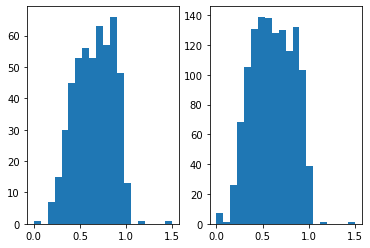

In [43]:
# perform interpolation on companion stars
companions = np.empty(len(compMasses), dtype=object)

for i in range(len(companions)):
    if stars[i + first_binary] is None:
        continue
    companions[i] = interpolator.interpolate(level_ages_myr[i + first_binary], compMasses[i], instances, log_age_arr, filters)

for i in range(len(companions)):
    if companions[i] is None:
        continue
    companions[i][0] = companions[i][0] * watts_to_lsun
    
count = 0
for i in range(len(companions)):
    if companions[i] is None:
        count = count + 1
        continue
    print(companions[i])

print(count)
print(len(companions))

new_ratios = []
for i in range(len(companions)):
    if companions[i] is None:
        continue
    new_ratios.append(compMasses[i] / masses[i + first_binary])

py.subplot(1,2,1)
py.hist(new_ratios, bins=20, range=[0, 1.5])
py.subplot(1,2,2)
py.hist(ratios, bins=20, range=[0,1.5])

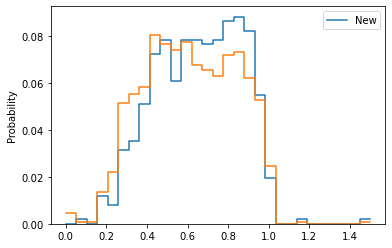

In [44]:
import seaborn as sns

bins = np.linspace(0, 1.5, 30)

sns.histplot(new_ratios, bins=bins, stat='probability', element='step', cumulative=False, fill=False, label="New")
sns.histplot(ratios, bins=bins, stat='probability', element='step', cumulative=False, fill=False)
plt.legend()

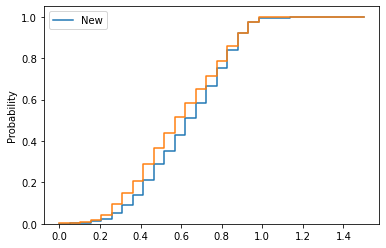

In [45]:
sns.histplot(new_ratios, bins=bins, stat='probability', element='step', cumulative=True, fill=False, label="New")
sns.histplot(ratios, bins=bins, stat='probability', element='step', cumulative=True, fill=False)
plt.legend()

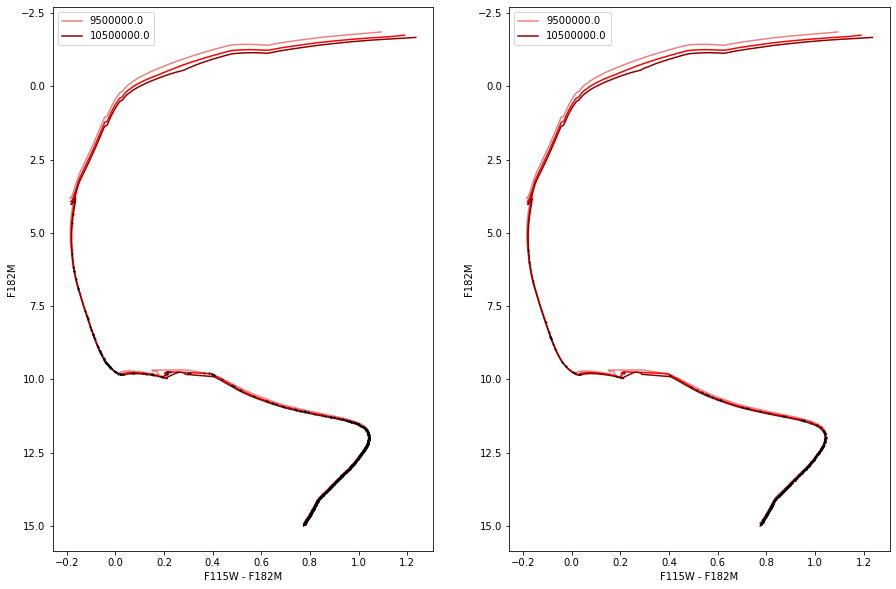

In [46]:
# plot primaries and companions separately
fig, axes = py.subplots(figsize=(15, 10))

# plot primaries
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
for i in range(0, first_binary):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

# plot companions
py.subplot(1, 2, 2)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
        
for i in range(len(companions)):
    if companions[i] is None:
        continue
    py.plot(companions[i][3] - companions[i][4], companions[i][4], marker='o', markersize=1, color='k')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

1.1066237839776676
2.0026266903409007
1.5388631498199539
1.4190575216890926
1.9444644164481306
2.436688423459584
1.253141174941418
1.2201128470319291
4.180228289540325
5.067572841772831
2.021156766960751
2.1359938601897963
1.4791083881682072
4.79071130003074
2.5965697902737817
2.259435770220978
1.8264172487743524
3.7222025301785022
1.8433168795057548
1.5052200686321264
1.6951182515313987
4.017908108489401
1.6025072388814179
2.307809729698403
6.292163512879859
1.3502058956622385
3.718775833249358
1.7426091898259302
3.5123679046568093
1.08243044760913
1.0073954848112523
1.1912420080273736
1.9989411112356625
1.0519618738232257
2.6841080835452282
1.1502705477901138
2.551526010909673
1.4441090844161193
3.9994474976109817
9.298223905853819
2.5142010301590227
1.8620871366628657
6.432799272608517
1.2635720185226553
2.041737944669532
1.0607181496353149
1.1619836038697957
1.8484171953696558
1.33045441797809
1.4886753594923627
3.047894989627977
16.3380416930068
1.3803842646028852
1.94804955329076

(array([  5.,   1.,   1., 143.,  89.,  61.,  40.,  42.,  19.,  19.,  12.,
          9.,  11.,   4.,  10.,   6.,   3.,   5.,   1.,   3.,   0.,   2.,
          1.,   2.,   1.,   1.,   1.,   1.,   0.,   0.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        ]),
 <BarContainer object of 30 artists>)

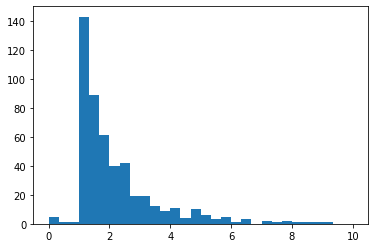

In [47]:
# combine magnitudes on binary stars
unresolved_binaries = np.empty(len(companions), dtype=object)

flux_ratios = []

for i in range(len(companions)):
    if stars[i + first_binary] is None or companions[i] is None:
        continue
    
    flux11 = np.power(10, stars[i + first_binary][3] / -2.5) * 3.93e-10
    flux21 = np.power(10, companions[i][3] / -2.5) * 3.93e-10
    flux_ratios.append(flux11 / flux21)
    mag1 = -2.5 * np.log10((flux11 + flux21) / 3.93e-10)
    
    flux12 = np.power(10, stars[i + first_binary][4] / -2.5) * 7.44e-11
    flux22 = np.power(10, companions[i][4] / -2.5) * 7.44e-11
    mag2 = -2.5 * np.log10((flux12 + flux22) / 7.44e-11)
    
    unresolved_binaries[i] = [mag1, mag2]

'''
for i in range(len(unresolved_binaries)):
    print(unresolved_binaries[i])
'''

for i in range(len(flux_ratios)):
    print(flux_ratios[i])
py.hist(flux_ratios, bins=30, range=[0,10])

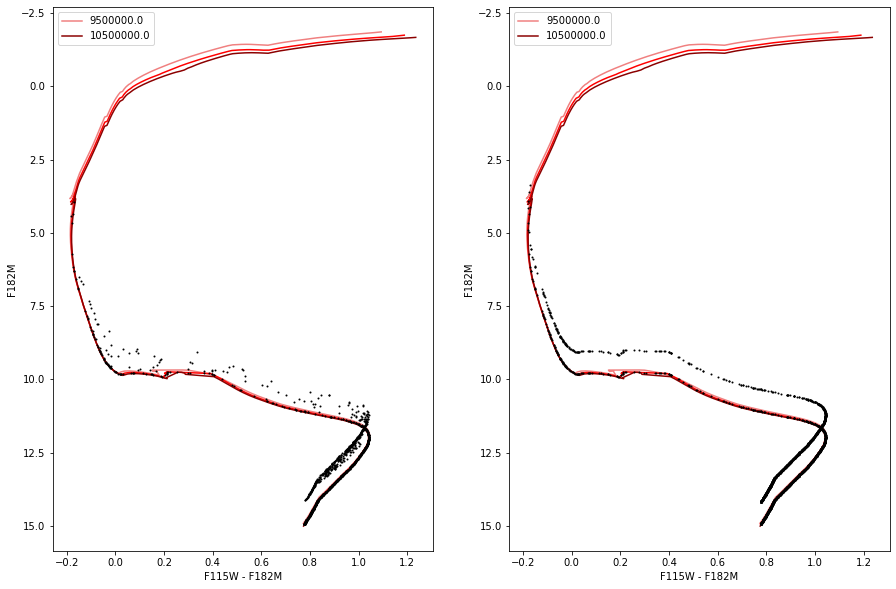

In [49]:
fig, axes = py.subplots(figsize=(15, 10))

# plot CMD
py.subplot(1, 2, 1)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(0, first_binary):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
for i in range(len(unresolved_binaries)):
    if unresolved_binaries[i] is None:
        continue
    py.plot(unresolved_binaries[i][0] - unresolved_binaries[i][1], unresolved_binaries[i][1], marker='o', markersize=1, color='k')
    
# plot toy scalar multiple track
py.subplot(1, 2, 2)
for i in range(len(idx_arr)):
    idx = idx_arr[i]
    if i == 0:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'lightcoral', label=level_age_arr[i])
    elif i == len(idx_arr) - 1:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'darkred', label=level_age_arr[i])
    else:
        py.plot(instances[idx].points[filters[0]] - instances[idx].points[filters[1]], 
           instances[idx].points[filters[1]], 'red', label='')
    
py.xlabel('F115W - F182M')
py.ylabel('F182M')
py.gca().invert_yaxis()
py.legend()

for i in range(len(stars)):
    if stars[i] is None:
        continue
    py.plot(stars[i][3] - stars[i][4], stars[i][4], marker='o', markersize=1, color='k')
    
for i in range(len(stars)):
    if stars[i] is None:
        continue
    x = -2.5 * np.log10(2 * np.power(10, stars[i][4] / -2.5))
    py.plot(stars[i][3] - stars[i][4], x, marker='o', markersize=1, color='k')